In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("sales_data.xlsx")

print("First 5 rows of data:")
display(df.head())

First 5 rows of data:


,Date,Region,SalesPerson,Product,Units,UnitPrice
0,2025-05-22,North,Grace,Printer,41,668
1,2025-06-01,East,Charlie,Monitor,40,1304
2,2025-04-16,South,Eve,Printer,29,1849
3,2025-06-05,North,Charlie,Tablet,33,819
4,2025-04-10,East,Eve,Monitor,21,586


In [2]:
df["TotalSales"] = df["Units"] * df["UnitPrice"]
print("After Adding Total Sales:")
display(df.head())

After Adding Total Sales:


,Date,Region,SalesPerson,Product,Units,UnitPrice,TotalSales
0,2025-05-22,North,Grace,Printer,41,668,27388
1,2025-06-01,East,Charlie,Monitor,40,1304,52160
2,2025-04-16,South,Eve,Printer,29,1849,53621
3,2025-06-05,North,Charlie,Tablet,33,819,27027
4,2025-04-10,East,Eve,Monitor,21,586,12306


In [3]:
sales = df.groupby("Region")["TotalSales"].sum()
print("Total Sales by Region:\n",sales)


Total Sales by Region:
 Region
East     469331
North    239700
South    376678
West     277945
Name: TotalSales, dtype: int64


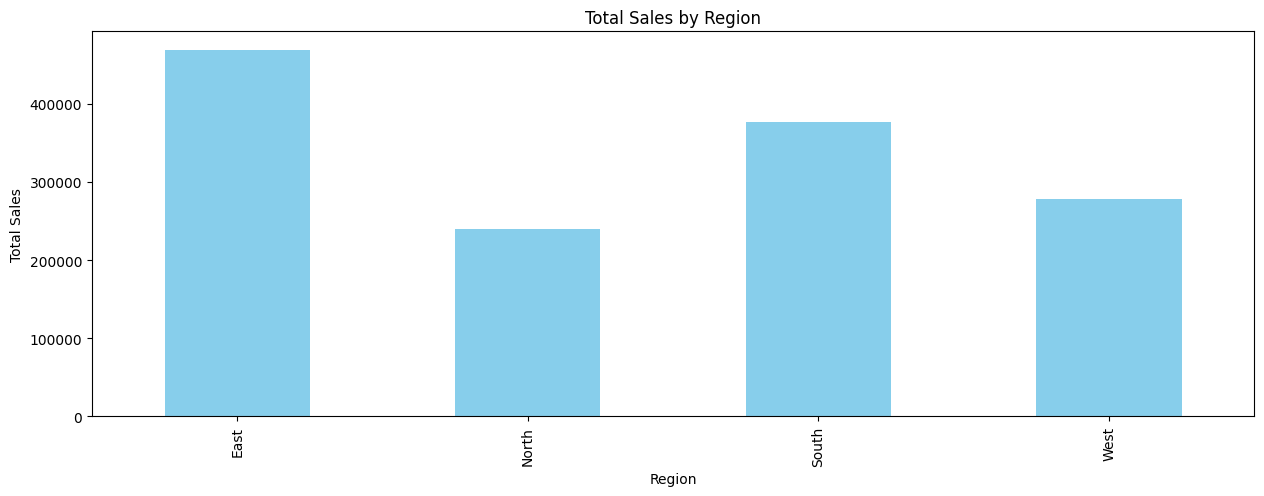

In [4]:
sales.plot(kind="bar", color="skyblue", figsize=(15,5))
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

In [5]:
top_salespersons = df.groupby(["SalesPerson", "Region"])["TotalSales"].sum().sort_values(ascending=False)

display(top_salespersons)
print("\nTop 3 Salespersons:")
print(top_salespersons.head(3))



SalesPerson  Region
Charlie      East      177750
Eve          West      164113
             South     154655
Hannah       South     153246
Grace        East       93036
             South      68777
Hannah       West       57006
Grace        North      56901
Hannah       East       55611
Eve          East       54703
Alice        North      49040
David        North      40560
Bob          North      39879
David        West       38184
Alice        East       34061
David        East       33622
Charlie      North      27027
Eve          North      21280
Frank        East       20548
Grace        West       18642
Frank        North       5013
Name: TotalSales, dtype: int64


Top 3 Salespersons:
SalesPerson  Region
Charlie      East      177750
Eve          West      164113
             South     154655
Name: TotalSales, dtype: int64


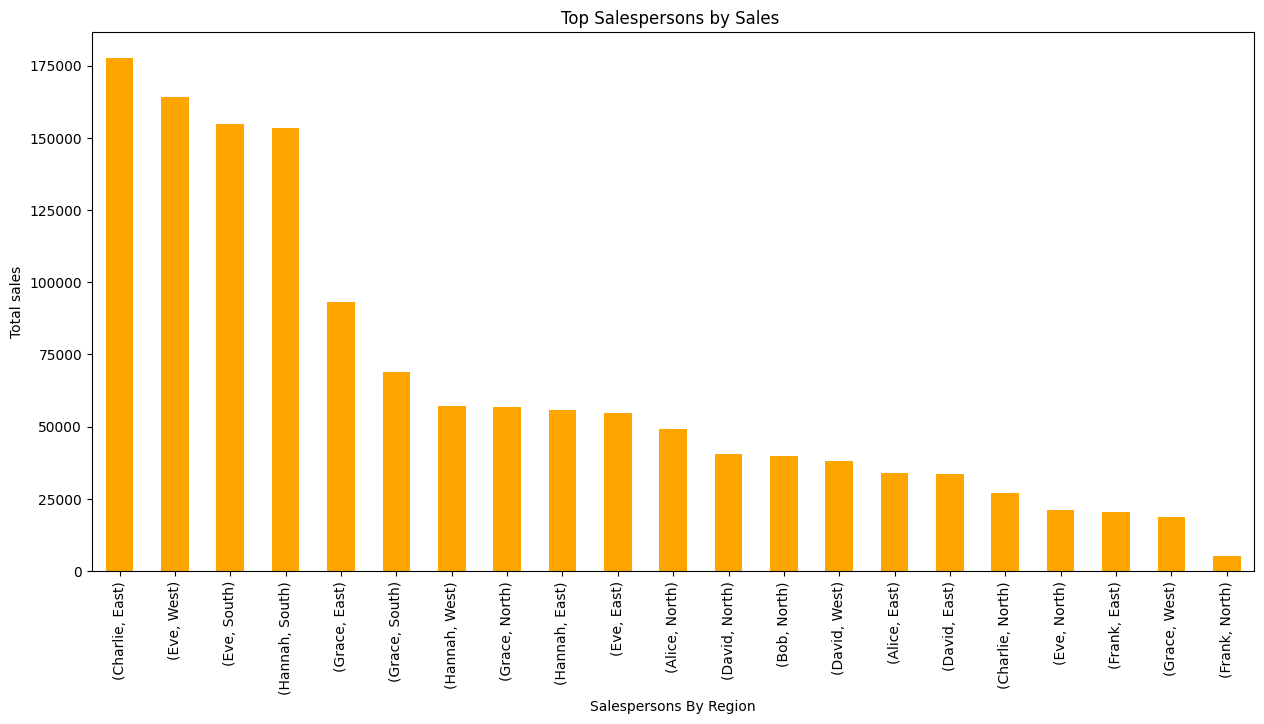

In [6]:
top_salespersons.plot(kind="bar", color="orange", figsize=(15,7))
plt.title("Top Salespersons by Sales ")
plt.xlabel("Salespersons By Region")
plt.ylabel("Total sales")
plt.show()

In [8]:
extract_highsales = df[df["TotalSales"] > 5000]
print("\nTransactions with TotalSales > 5000:")
display(extract_highsales)


Transactions with TotalSales > 5000:


,Date,Region,SalesPerson,Product,Units,UnitPrice,TotalSales
0,2025-05-22,North,Grace,Printer,41,668,27388
1,2025-06-01,East,Charlie,Monitor,40,1304,52160
2,2025-04-16,South,Eve,Printer,29,1849,53621
3,2025-06-05,North,Charlie,Tablet,33,819,27027
4,2025-04-10,East,Eve,Monitor,21,586,12306
6,2025-03-22,West,Hannah,Printer,19,1764,33516
7,2025-01-07,West,David,Headphones,20,673,13460
8,2025-04-05,East,Hannah,Monitor,33,342,11286
9,2025-01-23,West,Grace,Headphones,39,478,18642
10,2025-03-05,East,Charlie,Mouse,41,939,38499


In [9]:
each_product = df.groupby("Product").agg(
    TotalUnits=("Units", "sum"),
    AvgPrice=("UnitPrice", "mean")
)
print("\nProduct Analysis:")
display(each_product)


Product Analysis:


,TotalUnits,AvgPrice
Product,,
Headphones,154,815.714286
Keyboard,194,906.833333
Laptop,201,1051.857143
Mobile,32,665.000000
Monitor,256,1197.333333
Mouse,117,854.000000
Printer,202,1302.000000
Tablet,211,890.000000


In [10]:
sort_data = df.sort_values(by="TotalSales", ascending=False)
print("\nSorted Transactions:")
display(sort_data.head())


Sorted Transactions:


,Date,Region,SalesPerson,Product,Units,UnitPrice,TotalSales
42,2025-02-21,West,Eve,Monitor,49,1917,93933
16,2025-05-12,South,Hannah,Printer,46,1911,87906
44,2025-05-21,East,Grace,Laptop,39,1999,77961
21,2025-01-30,East,Charlie,Tablet,50,1332,66600
38,2025-05-14,South,Eve,Keyboard,33,1692,55836


In [11]:
sort_data.to_excel("sales_report.xlsx", index=False)